## Color segmentation

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import cv2

#### Try to split gray image to 15 parts using color segmentation

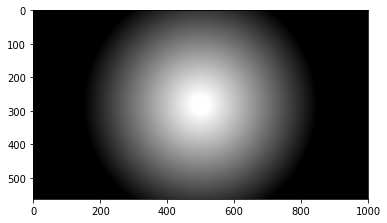

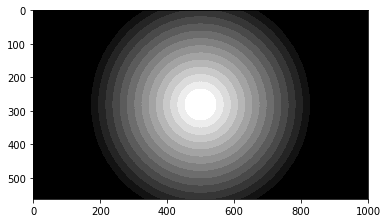

In [2]:
def grayscale(image):
    high = 255
    low = 0
    while high != 0:  
        low = high - 17
        low_color_bound = np.array([low])
        hight_color_bound = np.array([high])
        curr_mask = cv2.inRange(image, low_color_bound, hight_color_bound)
        image[curr_mask > 1] = high
        high -= 17
        
    return image
            
image = cv2.imread('images/circle.png')
plt.imshow(image, cmap='gray')
plt.show()

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image = grayscale(gray)
plt.imshow(image, cmap='gray')
plt.show()

In [3]:
def get_area_levels(input_im):
    image = cv2.cvtColor(input_im, cv2.COLOR_BGR2GRAY)
    high = 255
    low = 255
    first = True
    
    while(low != 0):
        low = high - 15
        if not first:
            # making values that are of a greater gray level black 
            # so it won't get detected
            low_color_bound = np.array([high])
            hight_color_bound = np.array([255])
            curr_mask = cv2.inRange(image, low_color_bound, hight_color_bound)
            image[curr_mask > 0] = 0
            
        # making values of this gray level white so we can calculate
        # it's area
        _, threshold = cv2.threshold(image, low, 255, 0)
        contours, hirerchy = cv2.findContours(threshold, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
        if len(contours) > 0:
            cv2.drawContours(input_im, contours, -1, (0, 0, 255), 3)
            high -= 15
            first = False

None


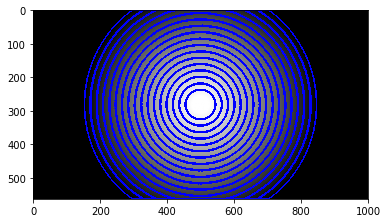

In [4]:
image = cv2.imread('images/circle.png')
print(get_area_levels(image))
plt.imshow(image, cmap='gray')
plt.show()

In [5]:
def color_segmentation(img_name):
    image = cv2.imread(img_name)
    fig = plt.figure(figsize=(14, 8))

    fig.add_subplot(2, 3, 1)
    plt.imshow(image)
    plt.title("Input image")

    hsv_img = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    fig.add_subplot(2, 3, 2)
    plt.imshow(hsv_img)
    plt.title("Image in HSV format")

    green_low = np.array([45 , 100, 50])
    green_high = np.array([75, 255, 255])
    curr_mask = cv2.inRange(hsv_img, green_low, green_high)
    hsv_img[curr_mask > 0] = ([75, 255, 200])
    fig.add_subplot(2, 3, 3)
    plt.imshow(hsv_img)
    plt.title("Green mask")

    ## converting the HSV image to Gray inorder to be able to apply contouring
    image_rgb = cv2.cvtColor(hsv_img, cv2.COLOR_HSV2RGB)
    gray = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2GRAY)
    fig.add_subplot(2, 3, 4)
    plt.imshow(gray)
    plt.title("In gray colors")


    _, threshold = cv2.threshold(gray, 90, 255, 0)
    fig.add_subplot(2, 3, 5)
    plt.imshow(threshold)
    plt.title("Binary mask")

    contours, hierarchy = cv2.findContours(threshold, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    cv2.drawContours(image, contours, -1, (0, 0, 255), 3)
    fig.add_subplot(2, 3, 6)
    plt.imshow(image)
    plt.title("Contours")

    plt.show()

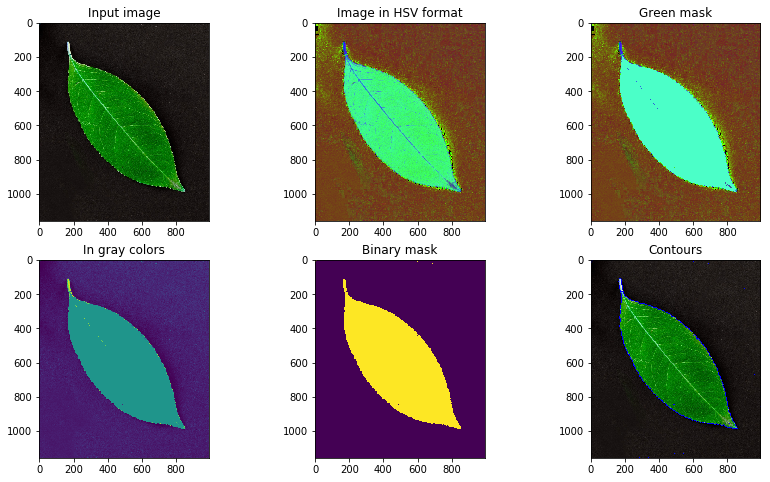

In [6]:
color_segmentation('images/list.jpeg')

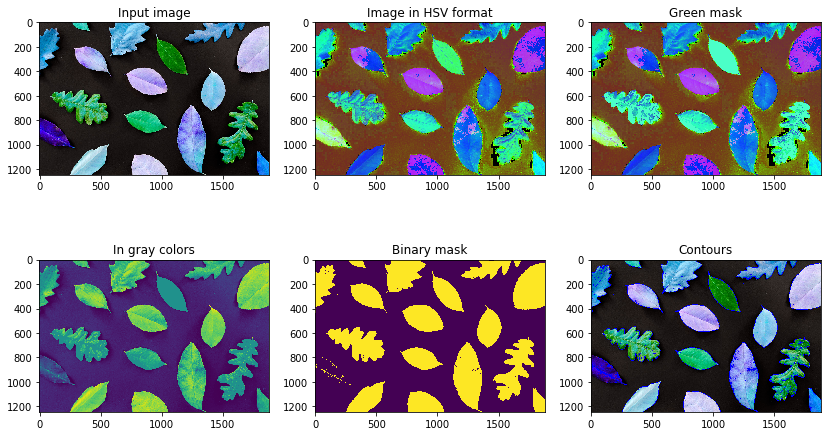

In [7]:
color_segmentation('images/lists.jpeg')